In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
import pickle
import anndata as ad
import os

In [2]:
def export_data(adata:ad.AnnData, datapath:str = "", celltype:str = "celltype", embedding:str = "X_umap") -> None:
    pseudotime = adata.obs["dpt_pseudotime"].tolist()
    mu = pd.DataFrame(adata.layers["Mu"].T, columns = adata.obs_names, index = adata.var_names)
    ms = pd.DataFrame(adata.layers["Ms"].T, columns = adata.obs_names, index = adata.var_names)
    celltypes = adata.obs[celltype].tolist()
    leiden = adata.obs["leiden"].tolist()
    embeddings = adata.obsm[embedding]
    
    mu.to_csv(os.path.join(datapath, "Mu.csv"))
    ms.to_csv(os.path.join(datapath, "Ms.csv"))
    with open(os.path.join(datapath, "pseudotime.pkl"), "wb") as f:
        pickle.dump(pseudotime, f)
    with open(os.path.join(datapath, "celltype.pkl"), "wb") as f:
        pickle.dump(celltypes, f)
    with open(os.path.join(datapath, "clusters.pkl"), "wb") as f:
        pickle.dump(leiden, f)
    with open(os.path.join(datapath, "embedding.pkl"), "wb") as f:
        pickle.dump(embeddings, f)

In [3]:
adata = scv.read("adata_postpro.h5ad", cache = True)

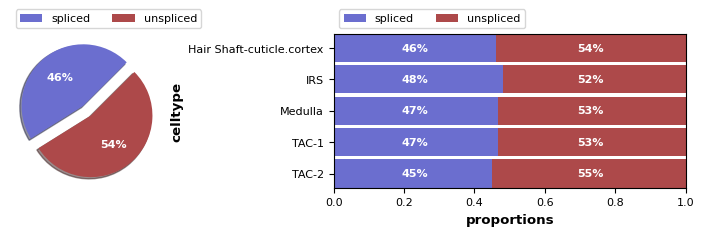

In [7]:
scv.pl.proportions(adata, groupby = "celltype", layers = ["spliced", "unspliced"])

In [8]:
sc.tl.leiden(adata)

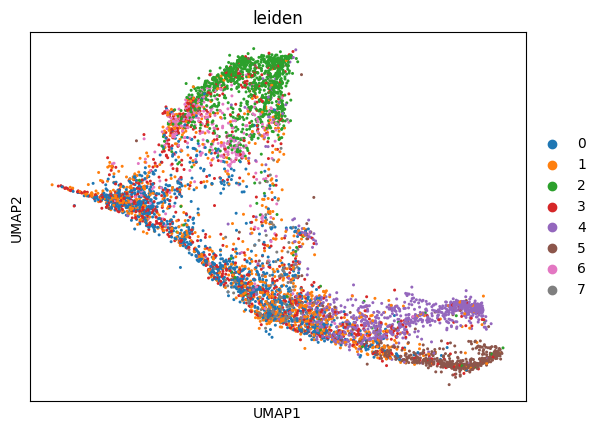

In [9]:
sc.pl.umap(adata, color = "leiden")

In [10]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden"] == '1')[0]

In [11]:
sc.tl.dpt(adata)

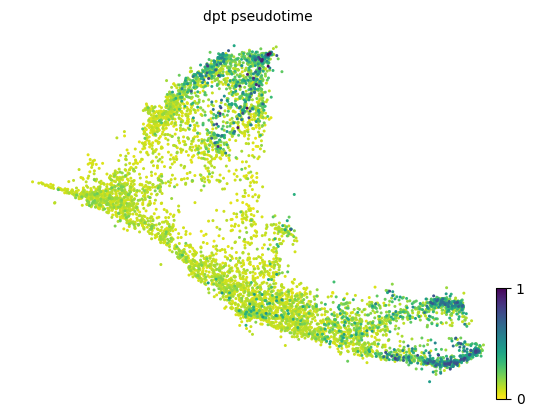

In [12]:
scv.pl.scatter(adata, basis = "umap", color = "dpt_pseudotime")

In [13]:
adata

AnnData object with n_obs × n_vars = 6436 × 962
    obs: 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'leiden', 'dpt_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'mean', 'std'
    uns: 'celltype_colors', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [14]:
export_data(adata, datapath = "data")